## Лабораторная работа 4
### Деревья решений
### Выполнил: 6131-010302D, Пчелкина Юлия Жиганшевна

###  1. Набор данных

Выберите наборы данных, подходящие для многоклассовой и бинарной классификации. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, confusion_matrix, accuracy_score, roc_curve


Набор данных относится к красному португальскому вину «Vinho Verde»

In [3]:
df = pd.read_csv('winequality-red.csv', sep=',')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

работать будем с качеством. Поделим на две категории: больше 5 - хорошее качество

In [6]:
df['quality'] = df['quality'].apply(lambda val: 'good' if val > 5 else 'bad')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


#### 1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью pd.factorize / pd.get_dummies

In [7]:
# factorize для факторизации столбца видов в наборе данных. Это создаст и факторы, и определения для факторов.

factor = pd.factorize(df['quality'])
df.quality = factor[0]
definitions = factor[1]

In [8]:
print(df.quality.head())

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64


In [9]:
print(definitions)

Index(['bad', 'good'], dtype='object')


#### 1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета KNeighborsClassifier (без использования конвееров)

Разделим набор данных на независимые и зависимые переменные. 

Первые 11 столбцов (без предпоследнего) являются независимыми переменными

Cтолбец "quality" - будет зависимой переменной. 

Сохраняем как массив

In [10]:
X = df.iloc[:, 0:11].values
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [11]:
Y = df.iloc[:, 11].values
Y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

Поделили данные на обучающую и тестовую выборки в соотношении 1:3

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 21)

Нормализуем значения

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Классификатор K-соседей

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# пусть для 13 соседей
   
model_KNN = KNeighborsClassifier(n_neighbors = 13)
    
model_KNN.fit(X_train, Y_train)
Y_KNN = model_KNN.predict(X_test)
  
accuracy_score(Y_test, Y_KNN) 

0.7475

#### 1.2. То же самое и использованием sklearn.pipeline.Pipeline

Cоздаём массив последовательности «шагов» конвейера.

Сначала необходимо стандартизировать данные, а уже затем выполнить предсказание

In [16]:
from sklearn.pipeline import Pipeline

In [17]:
scaler = StandardScaler()
KNN = KNeighborsClassifier()

steps = [('normalizer', scaler), ('KNN', KNN)]
pipe = Pipeline(steps)

#### 1.3. С помощью GridSearchCV произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели

Гиперпараметры - это настраиваемые параметры, которые необходимо настроить, чтобы получить модель с оптимальными характеристиками.

Для KNeighborsClassifier:
- n_neighbors - это количество соседей, которые нужно использовать, 
- weights - весовая функция,используемая при прогнозировании
- algorithm - алгоритм, используемый для вычисления ближайших соседей

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
params_KNN = \
     {'KNN__n_neighbors': np.arange(5, 50), 
     'KNN__weights': ['uniform', 'distance'], 
     'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search_KNN = GridSearchCV(pipe, params_KNN)

In [20]:
grid_search_KNN.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('normalizer', StandardScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             param_grid={'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'KNN__n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'KNN__weights': ['uniform', 'distance']})

In [21]:
print(grid_search_KNN.score(X_test, Y_test))

grid_search_KNN.best_params_

0.8175


{'KNN__algorithm': 'auto', 'KNN__n_neighbors': 46, 'KNN__weights': 'distance'}

### 2. Дерево решений

#### 2.1. Продемонстрировать работу DecisionTreeClassifier, посчитать метрики качества на отложенной выборке

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, Y_train)

DecisionTreeClassifier()

In [24]:
accuracy_score(Y_test, DTC.predict(X_test))

0.75

#### 2.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиска наилучшего дерева 

Гиперпараметры: max_depth, max_features 

In [25]:
scaler = StandardScaler()

steps_DTC = [('normalizer', scaler), ('DTC', DTC)]
pipe_DTC = Pipeline(steps_DTC)

In [26]:
params_DTC = \
     {'DTC__max_depth': np.arange(1, 10),
     'DTC__splitter': ['best', 'random'],
     'DTC__criterion': ['gini', 'entropy'],
     'DTC__max_features': ['auto', 'sqrt', 'log2']}

grid_search_DTC = GridSearchCV(pipe_DTC, params_DTC)

In [27]:
grid_search_DTC.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('normalizer', StandardScaler()),
                                       ('DTC', DecisionTreeClassifier())]),
             param_grid={'DTC__criterion': ['gini', 'entropy'],
                         'DTC__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'DTC__max_features': ['auto', 'sqrt', 'log2'],
                         'DTC__splitter': ['best', 'random']})

In [28]:
print(grid_search_DTC.score(X_test, Y_test))

grid_search_DTC.best_params_

0.76


{'DTC__criterion': 'gini',
 'DTC__max_depth': 9,
 'DTC__max_features': 'log2',
 'DTC__splitter': 'best'}

#### 2.3. Для полученного наилучшего дерева построить график feature_importances 

дополнительно напечатать 3 наиболее важных признака, отсортировав их по убыванию важности

In [29]:
print(DTC.feature_importances_)

[0.067634   0.11398516 0.05103862 0.05846796 0.08221985 0.05732345
 0.09837424 0.05917043 0.05986114 0.10107138 0.25085376]


In [30]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

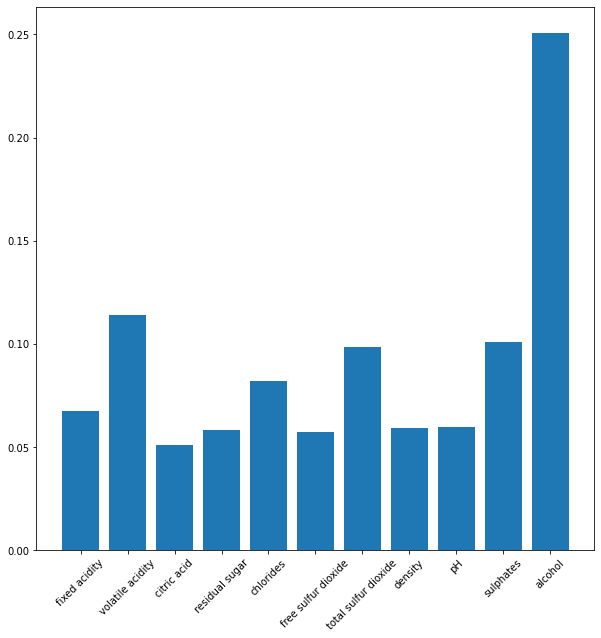

In [31]:
plt.figure(figsize=(10,10))
plt.bar(df.columns[0:11], DTC.feature_importances_)
plt.xticks(rotation=45)


In [32]:
# признак - значимость
l = np.vstack([DTC.feature_importances_, df.columns[0:11]]).T


In [33]:
# сортируем
sorted(l, key = lambda student: student[0], reverse=True)

[array([0.2508537619251675, 'alcohol'], dtype=object),
 array([0.11398516358864676, 'volatile acidity'], dtype=object),
 array([0.10107137685301722, 'sulphates'], dtype=object),
 array([0.0983742440433951, 'total sulfur dioxide'], dtype=object),
 array([0.08221985381153954, 'chlorides'], dtype=object),
 array([0.06763400219027474, 'fixed acidity'], dtype=object),
 array([0.0598611428159139, 'pH'], dtype=object),
 array([0.05917042850892203, 'density'], dtype=object),
 array([0.05846795563099481, 'residual sugar'], dtype=object),
 array([0.05732345032771535, 'free sulfur dioxide'], dtype=object),
 array([0.051038620304412974, 'citric acid'], dtype=object)]

### 3. Случайный лес

#### 3.1. Продемонстрировать работу случайного леса RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
RFC = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
RFC.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [36]:
accuracy_score(Y_test, RFC.predict(X_test))

0.7725

#### 3.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики

In [37]:
scaler = StandardScaler()

steps_RFC = [('normalizer', scaler), ('RFC', RFC)]
pipe_RFC = Pipeline(steps_RFC)

In [38]:
params_RFC = \
     {'RFC__n_estimators': np.arange(10, 100),
     'RFC__criterion': ['gini', 'entropy'],
     'RFC__max_features': ['auto', 'sqrt', 'log2']}


In [39]:
grid_search_RFC = GridSearchCV(pipe_RFC, params_RFC)

In [40]:
grid_search_RFC.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('normalizer', StandardScaler()),
                                       ('RFC',
                                        RandomForestClassifier(criterion='entropy',
                                                               n_estimators=10,
                                                               random_state=42))]),
             param_grid={'RFC__criterion': ['gini', 'entropy'],
                         'RFC__max_features': ['auto', 'sqrt', 'log2'],
                         'RFC__n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [41]:
print(grid_search_RFC.score(X_test, Y_test))

grid_search_RFC.best_params_

0.8125


{'RFC__criterion': 'entropy',
 'RFC__max_features': 'auto',
 'RFC__n_estimators': 23}

Сделать выводы. Какой классификатор и с камими гиперпараметрами дал в итоге наилучший результат для выбранного датасета на отложенной выборке.

In [42]:
print('KNeighborsClassifier', grid_search_KNN.score(X_test, Y_test))
print('DecisionTreeClassifier', grid_search_DTC.score(X_test, Y_test))
print('RandomForestClassifier', grid_search_RFC.score(X_test, Y_test))


KNeighborsClassifier 0.8175
DecisionTreeClassifier 0.76
RandomForestClassifier 0.8125


Таким образом, лучший результат дал классификатор K-ближайших соседей

с параметрами:
- algorithm = 'auto'
- n_neighbors = 46
- weights = 'distance'